In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### Erste Programmieraufgabe

In [132]:
def f(t,y):
    f = np.cos(t)*y
    return f
    
def loeservergleich(h):
    k = int(50/h)
    
    # Anfangswerte:
    euler = np.array([[0,1]],dtype=float)
    collatz = np.array([[0,1]],dtype=float)
    heun = np.array([[0,1]],dtype=float)
    for i in range(k):
        # expliziertes Eulerverfahren
        euler = np.append(euler, [[euler[i,0]+h, euler[i,1]+h*f(euler[i,0], euler[i,1])]], axis=0)
        # Collatzverfahren
        collatz = np.append(collatz, [[collatz[i,0]+h, collatz[i,1]+h*f(collatz[i,0]+(h/2),collatz[i,1]+(h/2)*f(collatz[i,0], collatz[i,1]))]], axis=0)
        # Heunverfahren
        heun = np.append(heun, [[heun[i,0]+h, heun[i,1]+(h/2)*(f(heun[i,0], heun[i,1])+f(heun[i,0]+h,heun[i,1]+h*f(heun[i,0], heun[i,1])))]], axis=0)
    
    
    # Plot der Funktion und Annäherungen
    x = np.linspace(0,50,k)
    plt.plot(x,np.exp(np.sin(x)),  color='yellow', linewidth=7, label="Lösungsfunktion")
    plt.plot(euler[:,0], euler[:,1], color='green', linewidth=2, label="Euler (explizit)")
    plt.plot(collatz[:,0], collatz[:,1], color='red', linewidth=2, label="Collatz")
    plt.plot(heun[:,0], heun[:,1], color='blue', linewidth=2, label="Heun")
    plt.legend(loc="upper right")
    plt.xlim(0,50)
    plt.xlabel("t") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und verschiedene Annäherungen", pad ='15')
    plt.rcParams["figure.figsize"] = (15,15)
    plt.show()

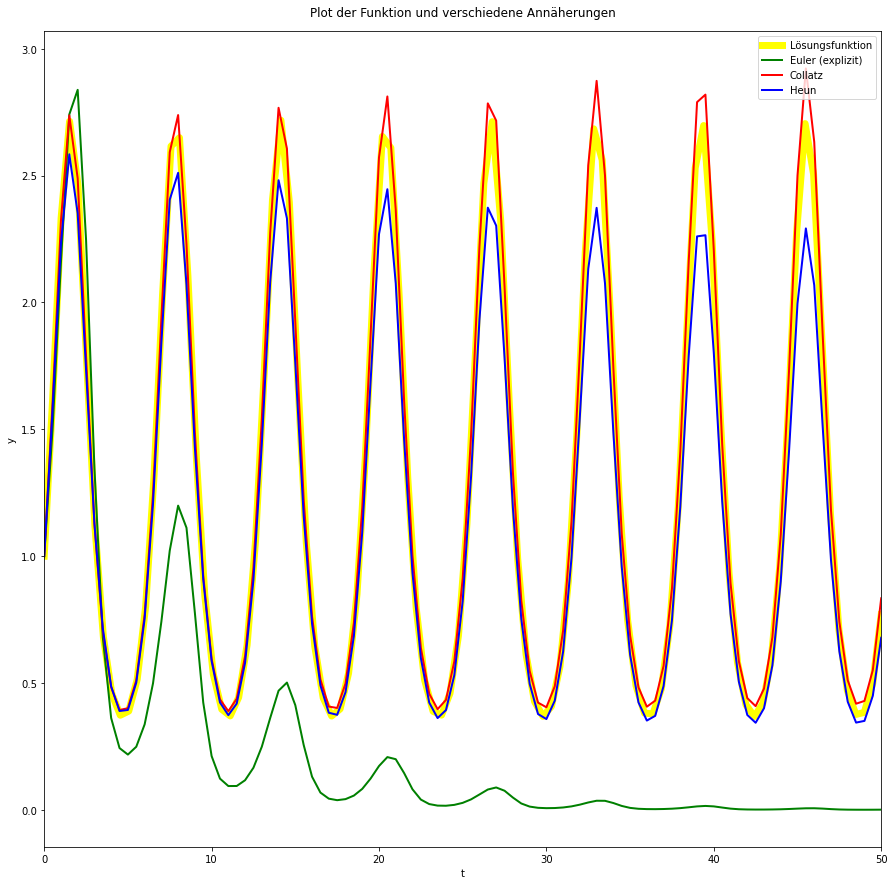

In [133]:
loeservergleich(0.5)